<a href="https://colab.research.google.com/github/Cyreaver/Module4-ML_task/blob/master/Cuthbert_Robert_4C_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
#Install required packages
%pip install tensorflow
%pip install scipy
%pip install keras
%pip install pandas
%pip install xlrd --upgrade
%pip install seaborn
#--upgrade to ensure the lastest xlrd is used, not the collab default version (1.1.0)

     |████████████████████████████████| 462 kB 4.9 MB/s 
     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')

# Import your dependencies
import tensorflow as tf
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Ensure the file `breast-cancer.xls` is it in root directory

In [3]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    #Import the data from Excel to a dataframe
    raw_df = pd.read_excel(file_path)
    return raw_df

In [4]:
local_file_path = "breast-cancer.xls"

In [5]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

# **Initial analysis highlighted several issues with the dataset:** 


 1.   **Incorrect Datatypes**: Various cells have been formatted as Datetime instead of a raw string. This caused data to be corrupted for fields such as `tumor-size` and `inv-nodes` for example data which was likely supposed to read `10-14` has been replaced with `Oct-14`. This causes some elements in the dataset to be imported correctly as a `string` and while others are incorrectly formated as a `timestamp`.

2.  **Missing Data**: Within both the `node-caps` and `breast-quad` fields there are several instances of the char `?`. Without customer engagemnet(out of scope of this project) there is no way to understand why this has been done. However, there is a realistic possiblity that the char `?` is used to represent missing data. There are only 9 total instances of `?` (8 in `node-caps` and 1 in `breast-quad`) which represents `3.15%` of the total dataset. With this being such a low percentatge of the data set, any record containing an instance of `?` within the data set will be removed. 

The following variable definations were identified through OSINT research into the subject: 


1. Age: age of the patient at the time of diagnosis

2. Menopause: whether the patient is pre- or postmenopausal at time of diagnosis

3. Tumor size: the greatest diameter (in mm) of the excised tumor

4. Inv-nodes: the number (range 0 - 39) of axillary lymph nodes that contain metastatic breast cancer visible on histological examination

5. Node caps: if the cancer does metastasise to a lymph node, although outside the original site of the tumor it may remain “contained” by the capsule of the lymph node. However, over time, and with more aggressive disease, the tumor may replace the lymph node and then penetrate the capsule, allowing it to invade the surrounding tissues

6. Degree of malignancy: the histological grade (range 1-3) of the tumor. Tumors that are grade 1 predominantly consist of cells that, while neoplastic, retain many of their usual characteristics. Grade 3 tumors predominately consist of cells that are highly abnormal

7. Breast: breast cancer may obviously occur in either breast

8. Breast quadrant: the breast may be divided into four quadrants, using the nipple as a central point

9. Irradiation: radiation therapy is a treatment that uses high-energy x-rays to destroy cancer cells. 

# **Pre-processing**


1. The `repair_dataset` fucntion below will repair the incorrectly formatted data.
2. The `remove_blanks` function will get rid of any records contains the irregular char `?`






In [6]:
#Repair incorrect datatypes (convert datatime to str for selected fields)

def repair_datatype(raw_data, field_id):
  #.copy() is required to prevent the dataframe from being linked and edited directly
  r_data = raw_data.copy()
  
  #cycle through each row, check if the field is datetime and if true convert to string, using the format 'Month-Year'
  for row in range(0, r_data.shape[0]):

    if type(r_data.iloc[row,field_id]) == datetime:
      r_data.iloc[row,field_id] = str(r_data.iloc[row,field_id].strftime('%-m-%-y'))
 
  return r_data



In [7]:
#Remove records containg missing data. (any instances of '?')

def remove_blanks(r_data):
  #.copy() is required to prevent the dataframe from being linked and edited directly
  f_data = r_data.copy()
  rm_data = []
  #Cycle through every field identifying any instance of '?' and dropping the record if found: 
  for field in range(0, f_data.shape[1]):
        for row in range(0, f_data.shape[0]):
            if f_data.iloc[row, field] == '?':
              #print('test1 {}'.format(f_data.iloc[row,field]))
              rm_data.append(row)

  f_data = f_data.drop(rm_data)

  #print(rm_data)        
  return f_data


# **Functions are called, correcting the data format and removing irregular characters within the dataset**

In [8]:
#pre-processing
#print(raw_data.iloc[7,2])

#Repair both the 'tumor-size' and 'inv-node' columns using the 'repair_datatype' function
r_data = repair_datatype(raw_data, 2)
r_data = repair_datatype(r_data, 3)
f_data = remove_blanks(r_data)




# **Analytical techniques applied to the data to identify trends**

In [9]:
#check the reformatted data data
f_data.head(25)


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,5-19,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,5-19,no,2,right,left_up,yes,no-recurrence-events
6,50-59,ge40,40-44,0-2,no,3,left,left_up,no,no-recurrence-events
7,40-49,premeno,10-14,0-2,no,2,left,left_up,no,no-recurrence-events
8,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
9,40-49,ge40,40-44,15-17,yes,2,right,left_up,yes,no-recurrence-events


In [10]:
#check dataframe information, looking for any missing or null data points
f_data.info()
f_data.isnull().sum()
f_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    int64 
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiat     277 non-null    object
 9   Class        277 non-null    object
dtypes: int64(1), object(9)
memory usage: 23.8+ KB


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [11]:
#list all unique values to ensure consistency 
for field_id in f_data.columns:
    print('{}'.format(field_id))
    print(f_data[field_id].value_counts())
    print('\n')


age
50-59    91
40-49    89
60-69    55
30-39    36
70-79     5
20-29     1
Name: age, dtype: int64


menopause
premeno    149
ge40       123
lt40         5
Name: menopause, dtype: int64


tumor-size
30-34    57
25-29    51
20-24    48
15-19    29
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
9-19      4
45-49     3
Name: tumor-size, dtype: int64


inv-nodes
0-2      209
5-19      34
8-19      17
11-19      7
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64


node-caps
no     221
yes     56
Name: node-caps, dtype: int64


deg-malig
2    129
3     82
1     66
Name: deg-malig, dtype: int64


breast
left     145
right    132
Name: breast, dtype: int64


breast-quad
left_low     106
left_up       94
right_up      33
right_low     23
central       21
Name: breast-quad, dtype: int64


irradiat
no     215
yes     62
Name: irradiat, dtype: int64


Class
no-recurrence-events    196
recurrence-events        81
Name: Class, dtype: int64




# **The following is a breakdown of all the field types vs reoccurance to identify any direct links:**

In [12]:
#code to plot percentages
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


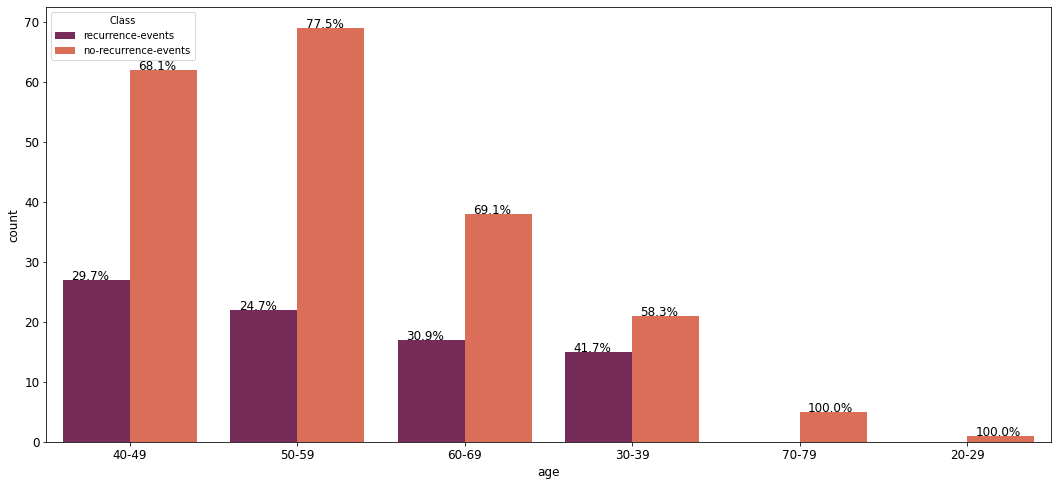

In [13]:
#Plot age vs recurrence
plt.figure(figsize =(18,8))
ax = sns.countplot('age', hue='Class', data =f_data,  palette="rocket")
plt.xticks(size = 12)
plt.xlabel('age', size=12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, f_data.age,6,2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


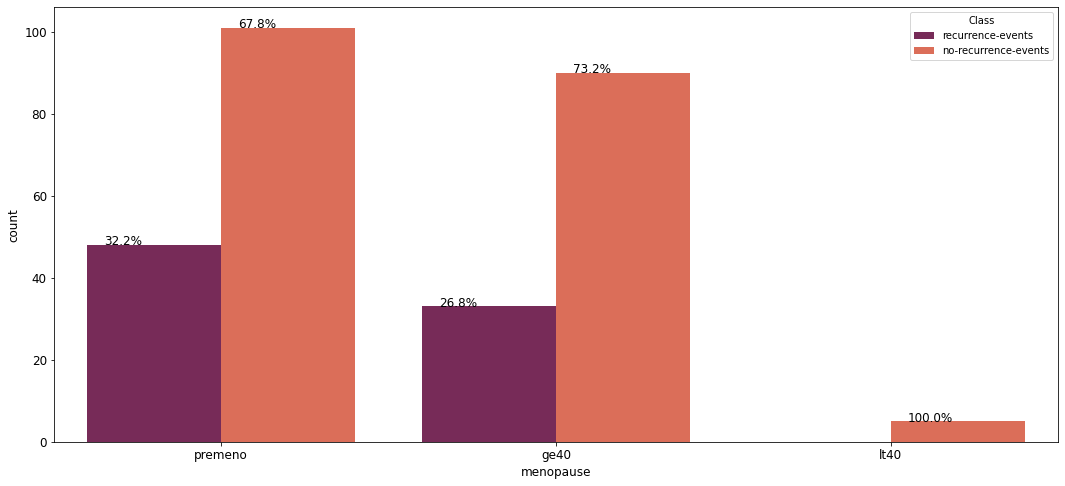

In [14]:
#Plot menopause vs recurrence
plt.figure(figsize =(18,8))
ax = sns.countplot('menopause', hue='Class', data =f_data,  palette="rocket")
plt.xticks(size = 12)
plt.xlabel('menopause', size=12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, f_data['menopause'],3,2)

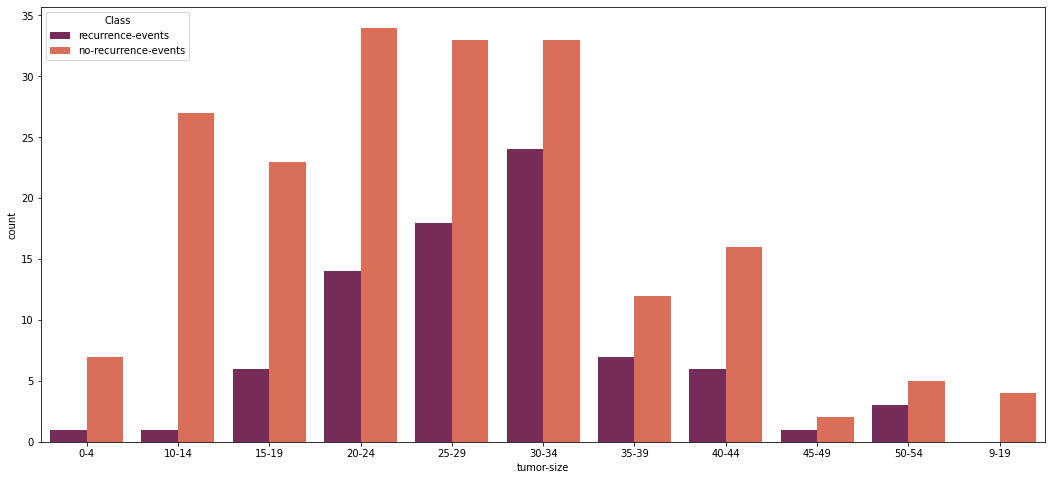

In [15]:
#Map tumor-size against recurrance
ordered = sorted(f_data['tumor-size'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='tumor-size', data=f_data, order= ordered, hue='Class', palette="rocket")

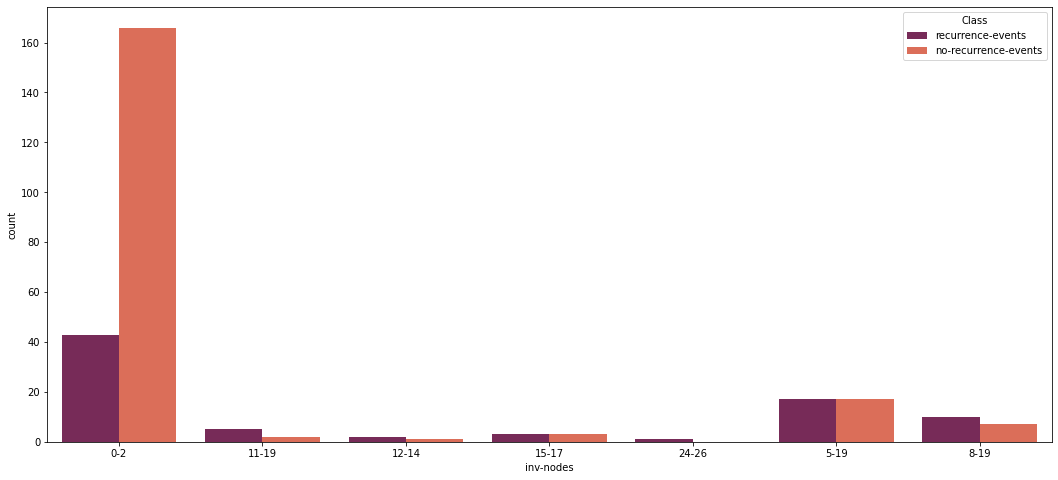

In [16]:
#Map inv-nodes against recurrance
ordered = sorted(f_data['inv-nodes'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='inv-nodes', data=f_data, order= ordered, hue='Class', palette="rocket")

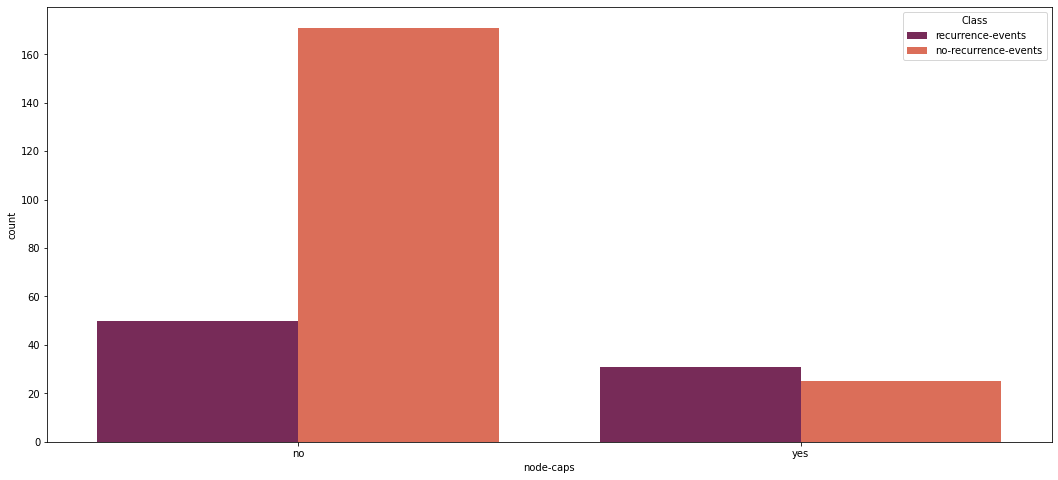

In [17]:
#Map node-caps against recurrance
ordered = sorted(f_data['node-caps'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='node-caps', data=f_data, order= ordered, hue='Class', palette="rocket")

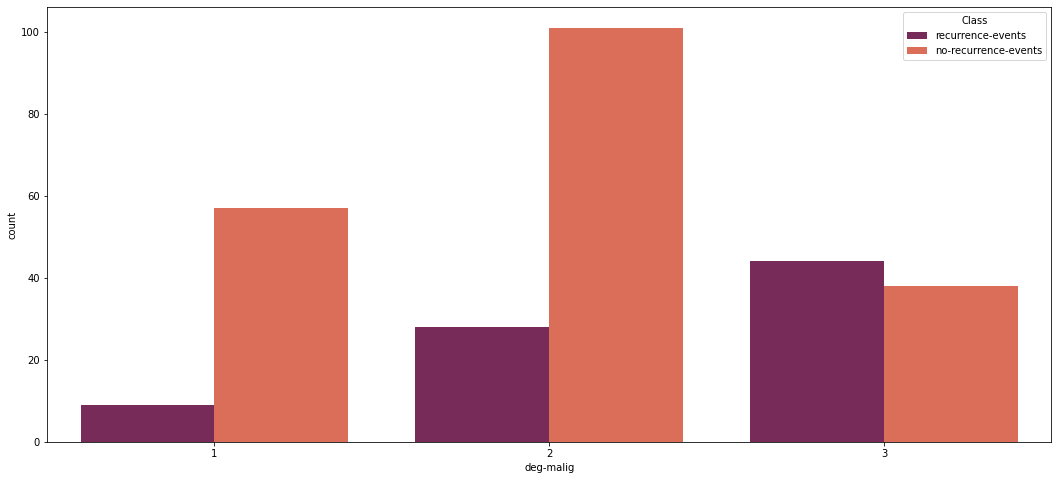

In [18]:
#Map deg-malig against recurrance
ordered = sorted(f_data['deg-malig'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='deg-malig', data=f_data, order= ordered, hue='Class', palette="rocket")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


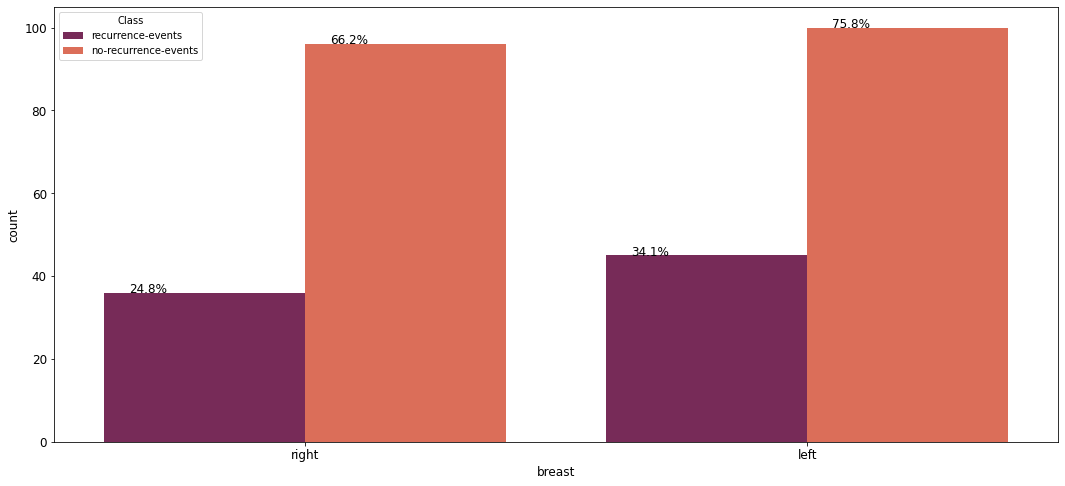

In [19]:
#Plot breast vs recurrence
plt.figure(figsize =(18,8))
ax = sns.countplot('breast', hue='Class', data =f_data,  palette="rocket")
plt.xticks(size = 12)
plt.xlabel('breast', size=12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)
with_hue(ax, f_data.breast,2,2)

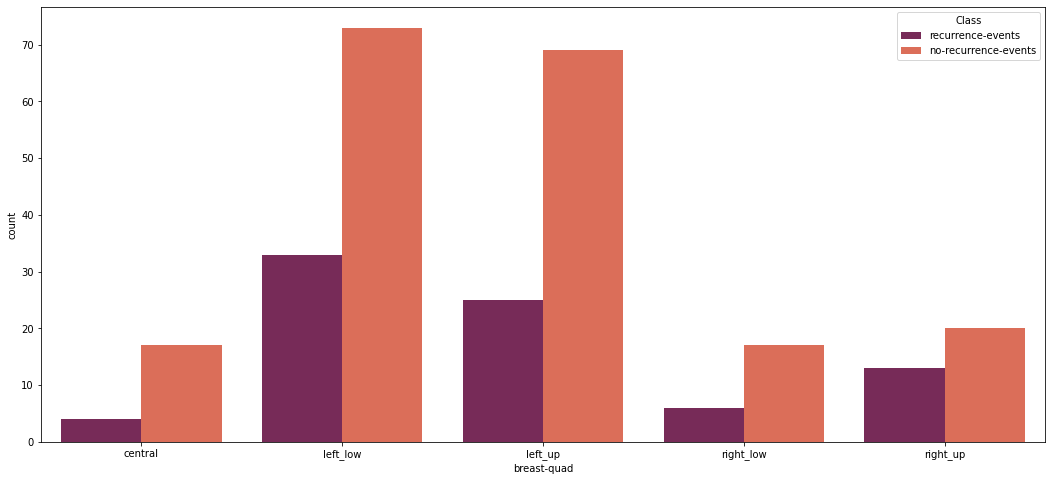

In [20]:
#Map breast-quad against recurrance
ordered = sorted(f_data['breast-quad'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='breast-quad', data=f_data, order= ordered, hue='Class', palette="rocket")

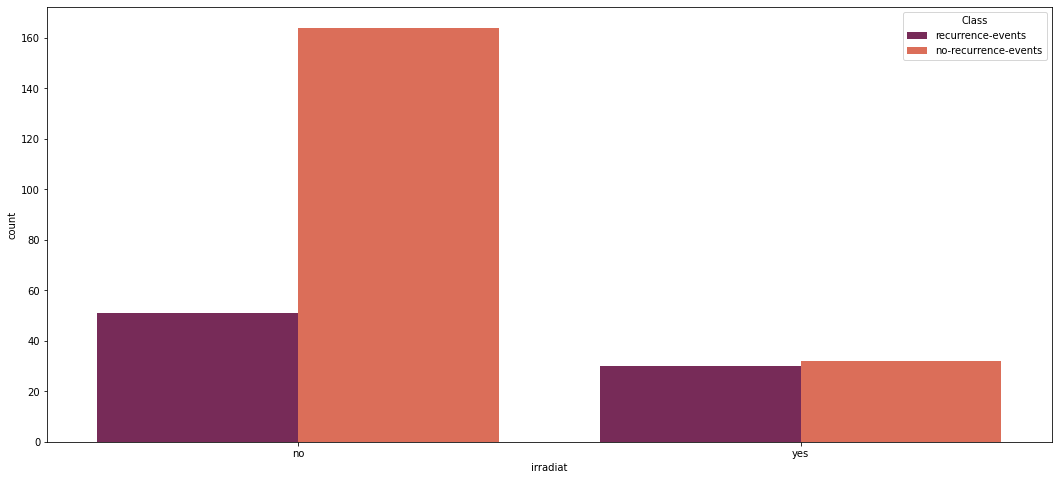

In [21]:
#Map breast-quad against recurrance
ordered = sorted(f_data['irradiat'].unique())

plt.figure(figsize=(18,8))
sns.countplot(x='irradiat', data=f_data, order= ordered, hue='Class', palette="rocket")

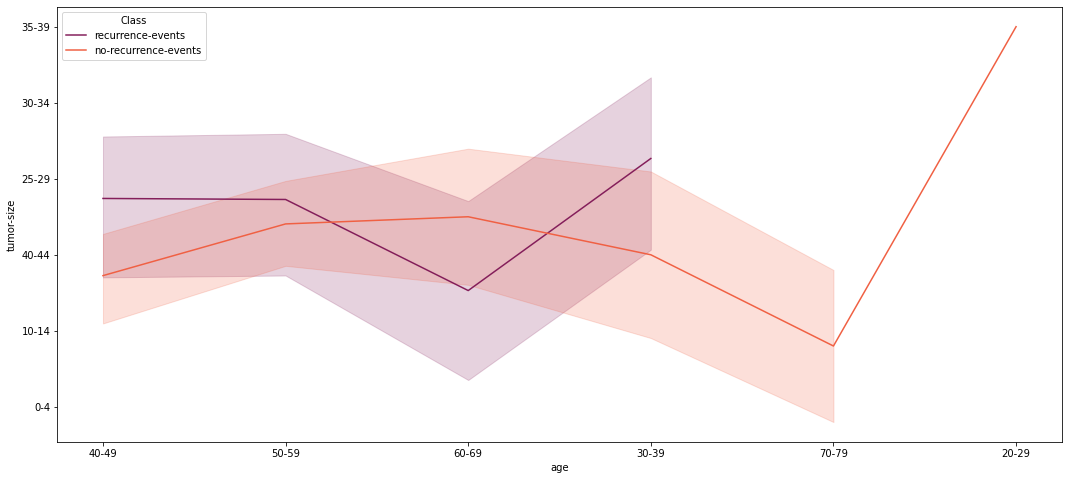

In [22]:
#age vs tumor-size against recurrance 
ordered = sorted(f_data['age'].unique())

plt.figure(figsize=(18,8))
sns.lineplot(x='age', y='tumor-size', hue='Class', data=f_data, palette="rocket")


#**Assigning values to strings for data analysis**



Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

As data analysis only works with values not strings, mutiple field types must be changes. For instance 'age' is a range such 20-29 and 'tumor-size' as 15-19. 

In [23]:
#Mean avg function
def mean(values):
  return (sum(values) / len(values))

In [24]:
#code to convert age to a value 
try:
  f_data['age'] = f_data['age'].apply(lambda age: int(age[:2]) + 5)
  f_data['age']

except:
  pass

In [25]:
f_data['tumor-size'].count()

277

In [26]:
#code to convert tumor-size to a value 
values = []
for row in range(0, f_data['tumor-size'].count()):
    item = f_data.iloc[row,2]
    values.append(item)

avg = []
values = sorted(values)
values = list(dict.fromkeys(values))

for value in values:
  try:
    loc = value.find('-')
    x = int(value[:loc])
    y = int(value[(loc +1):])
    z = []
    z.append(x)
    z.append(y)
    avg.append(mean(z))
  except:
    pass

try:
    f2_data = f_data.copy()
    f2_data['tumor-size'] = f2_data['tumor-size'].map({values[0]:avg[0],values[1]:avg[1],values[2]:avg[2],values[3]:avg[3],values[4]:avg[4],values[5]:avg[5],values[6]:avg[6],values[7]:avg[7],values[8]:avg[8],values[9]:avg[9],values[10]:avg[10]})

except:
  pass

f2_data.head(25)


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,45,premeno,17.0,0-2,yes,3,right,left_up,no,recurrence-events
1,55,ge40,17.0,0-2,no,1,right,central,no,no-recurrence-events
2,55,ge40,37.0,0-2,no,2,left,left_low,no,recurrence-events
3,45,premeno,37.0,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,45,premeno,32.0,5-19,yes,2,left,right_up,no,recurrence-events
5,55,premeno,27.0,5-19,no,2,right,left_up,yes,no-recurrence-events
6,55,ge40,42.0,0-2,no,3,left,left_up,no,no-recurrence-events
7,45,premeno,12.0,0-2,no,2,left,left_up,no,no-recurrence-events
8,45,premeno,2.0,0-2,no,2,right,right_low,no,no-recurrence-events
9,45,ge40,42.0,15-17,yes,2,right,left_up,yes,no-recurrence-events


Break the data into X and Y sets using recurrence-events as Y

In [27]:
X = f2_data.iloc[:, :-1].values
y = f2_data.iloc[:, -1].values
X = X.astype(str)


Convert categorical data such as recurrance menopuase / node-caps to numerical values. Recurrence-events will be done using Label Encoder as they only contain two values. The remaining will be done with OE

In [28]:
#convert Recurrance to values OLD
'''
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
#print(Y)

labelencoder_X = LabelEncoder()

#convert node-caps to values
X[:, 4] = labelencoder_Y.fit_transform(X[:, 4])

#convert breast to values
X[:, 6] = labelencoder_X.fit_transform(X[:, 6])

#convert irradiat to values
X[:, 8] = labelencoder_X.fit_transform(X[:, 8])

'''

'\nlabelencoder_y = LabelEncoder()\ny = labelencoder_y.fit_transform(y)\n#print(Y)\n\nlabelencoder_X = LabelEncoder()\n\n#convert node-caps to values\nX[:, 4] = labelencoder_Y.fit_transform(X[:, 4])\n\n#convert breast to values\nX[:, 6] = labelencoder_X.fit_transform(X[:, 6])\n\n#convert irradiat to values\nX[:, 8] = labelencoder_X.fit_transform(X[:, 8])\n\n'

In [29]:
print(X[1])

['55' 'ge40' '17.0' '0-2' 'no' '1' 'right' 'central' 'no']


In [30]:
# pre-processing X variables 

#find midpoint of inv-nodes and replace value with it
def findmid(field):
	dash = field.find('-')
	lb = int(field[0:dash])
	ub = int(field[dash+1:])
	return lb + (ub-lb)/2

for row in range(0, X.shape[0]):
  try:
	  X[row, 3] = findmid(X[row, 3])
  except:
     pass

print(X)

#Encode remaining fields with OHE 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,6,7,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# pre-processing Y variables, 
le = LabelEncoder()
y = le.fit_transform(y)

print(type(X))
print(X)
print(X[:10,:])

[['45' 'premeno' '17.0' ... 'right' 'left_up' 'no']
 ['55' 'ge40' '17.0' ... 'right' 'central' 'no']
 ['55' 'ge40' '37.0' ... 'left' 'left_low' 'no']
 ...
 ['35' 'premeno' '32.0' ... 'right' 'right_up' 'no']
 ['55' 'premeno' '17.0' ... 'right' 'left_low' 'no']
 ['55' 'ge40' '42.0' ... 'left' 'right_up' 'no']]
<class 'numpy.ndarray'>
[['0.0' '0.0' '1.0' ... '17.0' '1.0' '3']
 ['1.0' '0.0' '0.0' ... '17.0' '1.0' '1']
 ['1.0' '0.0' '0.0' ... '37.0' '1.0' '2']
 ...
 ['0.0' '0.0' '1.0' ... '32.0' '13.5' '2']
 ['0.0' '0.0' '1.0' ... '17.0' '1.0' '2']
 ['1.0' '0.0' '0.0' ... '42.0' '1.0' '3']]
[['0.0' '0.0' '1.0' '0.0' '1.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0'
  '1.0' '0.0' '45' '17.0' '1.0' '3']
 ['1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '1.0' '0.0' '0.0' '0.0' '0.0'
  '1.0' '0.0' '55' '17.0' '1.0' '1']
 ['1.0' '0.0' '0.0' '1.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0'
  '1.0' '0.0' '55' '37.0' '1.0' '2']
 ['0.0' '0.0' '1.0' '0.0' '1.0' '0.0' '1.0' '0.0' '1.0' '0.0' '0.0' '0.0'

In [31]:
# Split your data so that you can test the effectiveness of your model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#check split
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (185, 18) (185,)
Test (92, 18) (92,)


In [32]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.

# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [33]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
        self.sc = StandardScaler()      
        self.ann = None

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features required in the class
        """
        #feature scale against all fields as it's deep learnings. Last part of 
        processed_df = self.sc.fit_transform(training_df)
        return processed_df

    def preprocess_test_data(self, test_df):
      #test set must use the same scaler as the training set. 
        processed_df = self.sc.transform(test_df)
        return processed_df    

    def annModel(self):
      #Build the Ann
      self.ann = tf.keras.models.Sequential()
      #Add the inpuit layer and first hidden layer, 6 neruons (random amount)
      self.ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
      #add the second hidden layer
      self.ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
      #adding the output layer, output layer is 1 as the it is as binary value
      self.ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
      #comple the ANN, loss = binary_crossentropy as it is a binary outcome
      self.ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
      return self.ann

    def train(self): 
      #Training the ANN on the Training Set, default batchsize =32, default epochs=100
      self.ann.fit(x_train_processed, y_train, batch_size = 32, epochs = 100) 

    def evaluate(self):
      return self.ann.evaluate(x_train_processed, y_train, verbose=0)
    
    def k_train(self, X_train, y_train):
        return self.ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
    
    def k_evaluate(self, X_train, y_train):
        return self.ann.evaluate(X_train, y_train, verbose=0)


In [34]:
# Dont change
my_model = Module4_Model()

In [35]:
# Dont change (changed from x_train to X_train)
x_train_processed = my_model.preprocess_training_data(X_train)

In [36]:
print(x_train_processed[0])

[ 1.07292255 -0.12838815 -1.03858157  0.49153915 -0.49153915 -1.13311545
  1.13311545 -0.27492071 -0.79822813  1.42575835 -0.33831617 -0.34815531
  0.54194676 -0.54194676  0.3301391   0.4723013   1.60041845  1.31686806]


In [37]:
# Create a model
#Build the Ann
my_model.annModel()

In [38]:
# Dont change changed from (x_test to X_test)
x_test_processed = my_model.preprocess_test_data(X_test)


In [39]:
print(x_test_processed[0])

[ 1.07292255 -0.12838815 -1.03858157  0.49153915 -0.49153915  0.88252261
 -0.88252261 -0.27492071 -0.79822813 -0.70138113 -0.33831617  2.87228132
  0.54194676 -0.54194676  0.3301391   1.4189507  -0.54648435  1.31686806]


In [40]:
# Train your model
my_model.train()

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.7340 - accuracy: 0.5405
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7131 - accuracy: 0.5892
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.6270
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6432
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6703
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6865
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6329 - accuracy: 0.7027
Epoch 8/100
6/6 [==============================] - 0s 27ms/step - loss: 0.6205 - accuracy: 0.7135
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6100 - accuracy: 0.7081
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5986 - accuracy: 0.7135
Epoch 11/100
6/6 [==========

Converges at approx 84% accuaracy (at time of this run). More than enough.

In [41]:
data = my_model.evaluate()
print("Loss is {:.2f} \nAccuracy is {:.2f}%".format(data[0], data[1]*100))

Loss is 0.39 
Accuracy is 81.62%


In [42]:
# use your model to make a prediction on unseen data

# Tests / Predictions

In [43]:
#Predictions of tests using the x_test_processed sample
y_pred = my_model.ann.predict([x_test_processed])
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]]


# Confusion Matrix

In [44]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  1]
 [28  5]]


0.6847826086956522

In [45]:
# Asssess the accuracy of your model and explain your key findings

The accuracy of the final model is 64% which is fairly poor for a binary classification, no better than a simple coin toss. 

 One of the main issues resulting this is the small sample size of the data. A sample of > 10,00 would create beter results as deep learning require large sample sizes. 

There could also be no relationship between the dependent and idepenent variable. 



# Multiple fold cross validation 

K fold cross validation will be used to independantly run the model 10 times and calculate the average accuracy and loss of the model 

In [46]:
def k_fold(kmodel, X_train, y_train, K, verbose):

    #define the inital varibles which will be used, this will be accuracy as loss as we will be averaging both values
    rand = np.random
    accuracy = []
    loss = []

    #pre-process / scale the x train 
    X_train_processed = kmodel.preprocess_training_data(X_train)

    #set up validator using skf
    skf  = StratifiedKFold(n_splits=K, shuffle=True)

    #Cycle between each of the folds, compling each model independantly and adding up all the values 
    fold= 1
    for train, test in skf.split(X_train_processed, y_train):

        kmodel.annModel()
        if(verbose):
            print("\nFold {} training \n ".format(fold))    
        history = kmodel.k_train(X_train_processed[train], y_train[train])
        scores = kmodel.k_evaluate(X_train_processed[train], y_train[train])
        accuracy.append(scores[1] * 100)
        loss.append(scores[0])
        fold = fold + 1

    #simple process to print the accuracy and loss of each fold, followed by a combined average. 
    if(verbose):
        print("\n\nOverview of each fold's results\n")
        for i in range(0, len(accuracy)):
            print("Fold number {} - Accuracy = {:.2f}%, Loss = {:.2f}".format(i+1, accuracy[i], loss[i]))
        #output average accuracy of all the folds: 
        print("\n\nAverage over all folds: \n\nModel Accuracy: {:.2f}% +-{:.2f} (Standard deviation)\nLoss: {:.2f}".format(np.mean(accuracy), np.std(accuracy), np.mean(loss)))
        
    return (np.mean(accuracy), np.std(accuracy), np.mean(loss))

In [47]:
k_model = Module4_Model()
#set :-2 to the number of folds (10 default) and :-1 as the verbosity
k_fold(k_model, X_train, y_train,  10, 1)


Fold 1 training 
 
Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 0.6312 - accuracy: 0.7530
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6245 - accuracy: 0.7289
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6182 - accuracy: 0.7349
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.7349
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6073 - accuracy: 0.7349
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.7470
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5970 - accuracy: 0.7410
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5924 - accuracy: 0.7410
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.7410
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 0.5841 - accuracy: 0.7410
Epoch 11/

(82.1621823310852, 2.2296368837207425, 0.3794264912605286)

# Tuning the Model

The SKLearn function GridSearchCv will be used for hyperparameter tuning. This is done to improve the fficiency of the model by tuning the parameters of the neural network itself, rather than it's input. 



In [48]:
#copy of the previous ANN but allow for units to be replaced 

def tune_ann(unit):
  ann = None
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )
  return ann

tune_model=KerasClassifier(build_fn=tune_ann)   

#Create a dict of all the parameters that will be used to tune the model / passed to GridSearchCV as parameters
params={'batch_size':[100, 20, 50, 25, 32], 
        'nb_epoch':[200, 100, 300, 400],
        'unit':[5,6, 10, 11, 12, 15],          
        }      

#initise GridSearch, 10 k-folds per parameters might be excessive and time consuming but will get a great result
gs=GridSearchCV(estimator=tune_model, param_grid=params, cv=10)

#preprocess the data and scale it
X = my_model.preprocess_training_data(X)
sc = StandardScaler()
X = sc.fit_transform(X)

#Fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y)

#print out the best accuarcy seen through the tuning and list the best parameters for it. 
best_params=gs.best_params_
accuracy=gs.best_score_

print("\n\nBest possible Accuracy = {:.2f}%\nParameters to achive this results = {} ".format(accuracy, best_params))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


14/14 [==============================] - 1s 3ms/step - loss: 0.7925 - accuracy: 0.4368


Best possible Accuracy = 0.63%
Parameters to achive this results = {'batch_size': 20, 'nb_epoch': 300, 'unit': 10} 


# Running the Tuned model

Test the best performing tuned model again the test data
Parameters= 'batch_size': 20, 'nb_epoch': 300, 'unit': 15



In [49]:
final_ann = tune_ann(15)

#preprocess the data and scale it
X = my_model.preprocess_training_data(X)

#fit the model / train
final_ann.fit(x_train_processed, y_train, batch_size = 20, epochs = 300) 

#Evaluate
data = final_ann.evaluate(x_train_processed, y_train, verbose=0)
print("Loss is {:.2f} \nAccuracy is {:.2f}%".format(data[0], data[1]*100))




Epoch 1/300
10/10 [==============================] - 1s 2ms/step - loss: 0.6165 - accuracy: 0.6865
Epoch 2/300
10/10 [==============================] - 0s 2ms/step - loss: 0.5825 - accuracy: 0.7243
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7676
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 0.5300 - accuracy: 0.7730
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.7730
Epoch 6/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7730
Epoch 7/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7784
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7784
Epoch 9/300
10/10 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.7784
Epoch 10/300
10/10 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7784
Epoch 11/

Use the best tuned model to make unseen predictions:

In [50]:
#Predictions of tests using the x_test_processed sample
y_pred = final_ann.predict([x_test_processed])
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

#confusion matrix of results: 
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix {} \n Accuracy: {:.2f}%".format(cm, accuracy_score(y_test, y_pred)*100))

[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]

Confusion matrix [[51  8]
 [22 11]] 
 Accuracy: 67.39%


# Results of the best tuned model

The best tuned model had an accuracy of 67.39%. Although higher than the orginal model's accuracy it is still low for a binary choice model.

To recap the issues: 

* The small sample size of the data. A sample of > 10,00 would create better results as deep learning require large sample sizes.

* There could also be no relationship between the dependent and idepenent variable.

### Unit tests:

#### Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [51]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [52]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)